# Training Word Embeddings with gensim Word2Vec

In [1]:
import re, pickle

import gensim, nltk, regenerator
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/idfah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_stream = regenerator.Stream.from_txt('wikipedia.txt') #.islice(10_1000)
data_stream = data_stream.map(lambda line: line.strip('\r\n')).filter(lambda item: item)
list(data_stream.islice(3))

['Anarchism',
 "Anarchism is an anti-authoritarian political and social philosophy that rejects hierarchy as unjust and advocates its replacement with self-managed, self-governed societies based on voluntary, cooperative institutions. These institutions are often described as stateless societies, although several authors have defined them more specifically as distinct institutions based on non-hierarchical or free associations. Anarchism's central disagreement with other ideologies is that it holds the state to be undesirable, unnecessary, and harmful.",
 'Anarchism is usually placed on the far-left of the political spectrum, and much of its economics and legal philosophy reflect anti-authoritarian interpretations of communism, collectivism, syndicalism, mutualism, or participatory economics. As anarchism does not offer a fixed body of doctrine from a single particular worldview, many anarchist types and traditions exist and varieties of anarchy diverge widely. Anarchist schools of tho

In [4]:
class Tokenizer:                                                                                    
    def __init__(self, language='english'):
        self.language = language
        
        #self.nltk_word_tokenizer = nltk.tokenize.WordPunctTokenizer()
        self.nltk_word_tokenizer = nltk.tokenize.TreebankWordTokenizer()
        self.nltk_sent_tokenizer = nltk.data.load(
            'tokenizers/punkt/{}.pickle'.format(language))
                                                                                                    
    def __call__(self, text):
        return [self.nltk_word_tokenizer.tokenize(sent)
                for sent in self.nltk_sent_tokenizer.tokenize(text)]

In [5]:
tokenizer = Tokenizer()

In [6]:
token_stream = data_stream.map(tokenizer).unnest()
list(token_stream.islice(5))

[['Anarchism'],
 ['Anarchism',
  'is',
  'an',
  'anti-authoritarian',
  'political',
  'and',
  'social',
  'philosophy',
  'that',
  'rejects',
  'hierarchy',
  'as',
  'unjust',
  'and',
  'advocates',
  'its',
  'replacement',
  'with',
  'self-managed',
  ',',
  'self-governed',
  'societies',
  'based',
  'on',
  'voluntary',
  ',',
  'cooperative',
  'institutions',
  '.'],
 ['These',
  'institutions',
  'are',
  'often',
  'described',
  'as',
  'stateless',
  'societies',
  ',',
  'although',
  'several',
  'authors',
  'have',
  'defined',
  'them',
  'more',
  'specifically',
  'as',
  'distinct',
  'institutions',
  'based',
  'on',
  'non-hierarchical',
  'or',
  'free',
  'associations',
  '.'],
 ['Anarchism',
  "'s",
  'central',
  'disagreement',
  'with',
  'other',
  'ideologies',
  'is',
  'that',
  'it',
  'holds',
  'the',
  'state',
  'to',
  'be',
  'undesirable',
  ',',
  'unnecessary',
  ',',
  'and',
  'harmful',
  '.'],
 ['Anarchism',
  'is',
  'usually',
  '

In [7]:
lower_token_stream = token_stream.map(lambda line: list(map(str.lower, line)))
list(lower_token_stream.islice(5))

[['anarchism'],
 ['anarchism',
  'is',
  'an',
  'anti-authoritarian',
  'political',
  'and',
  'social',
  'philosophy',
  'that',
  'rejects',
  'hierarchy',
  'as',
  'unjust',
  'and',
  'advocates',
  'its',
  'replacement',
  'with',
  'self-managed',
  ',',
  'self-governed',
  'societies',
  'based',
  'on',
  'voluntary',
  ',',
  'cooperative',
  'institutions',
  '.'],
 ['these',
  'institutions',
  'are',
  'often',
  'described',
  'as',
  'stateless',
  'societies',
  ',',
  'although',
  'several',
  'authors',
  'have',
  'defined',
  'them',
  'more',
  'specifically',
  'as',
  'distinct',
  'institutions',
  'based',
  'on',
  'non-hierarchical',
  'or',
  'free',
  'associations',
  '.'],
 ['anarchism',
  "'s",
  'central',
  'disagreement',
  'with',
  'other',
  'ideologies',
  'is',
  'that',
  'it',
  'holds',
  'the',
  'state',
  'to',
  'be',
  'undesirable',
  ',',
  'unnecessary',
  ',',
  'and',
  'harmful',
  '.'],
 ['anarchism',
  'is',
  'usually',
  '

In [8]:
vocab_size = 150_000
embed_dim = 32

In [9]:
counts = collections.Counter(lower_token_stream.unnest())
len(counts)

10373727

In [10]:
most_common_words = counts.most_common(vocab_size)
most_common_words[:10]

[('the', 158744676),
 (',', 127369086),
 ('.', 101325279),
 ('of', 74563192),
 ('in', 64654731),
 ('and', 64030532),
 ('a', 46463660),
 ('to', 45261934),
 ('was', 27922337),
 ("''", 25539396)]

In [11]:
del counts

In [12]:
min_count = most_common_words[-1][1]
min_count

235

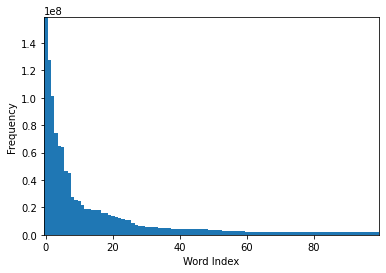

In [13]:
words, counts = zip(*most_common_words[:100])

plt.bar(range(len(counts)), counts, width=1.0);
plt.autoscale(tight=True);
plt.xlabel('Word Index');
plt.ylabel('Frequency');

In [14]:
vocab = set(word for word, count in most_common_words)
vocab

{'housley',
 '1678',
 'sportsman',
 'transmits',
 'saris',
 'mk4',
 'rtt',
 'linewidth',
 'mccarthyism',
 'küçük',
 'specimens',
 'best-performing',
 'male-dominated',
 'agger',
 'cómo',
 'birthed',
 'stepchildren',
 'tenkasi',
 'arasu',
 'epsom',
 'redhead',
 'bhattacharyya',
 'bobbili',
 'counteracted',
 'car',
 'tillery',
 'amavasya',
 'hens',
 'bengt',
 'dorgan',
 'vallenato',
 'expeditiously',
 'aman',
 'hillgruber',
 'mohini',
 'mahadevan',
 'failed',
 'bgp',
 'widows',
 'femininity',
 'astrological',
 'octavio',
 'trane',
 'kari',
 'harmonise',
 'mmk',
 'huot',
 'hedges',
 'beyk',
 'sev',
 'chill',
 'bexley',
 'achaemenids',
 'seminar',
 '185th',
 'juridical',
 'triborough',
 'seer',
 'newsweekly',
 'tanglin',
 'risa',
 'amusing',
 'joint-venture',
 'unsolicited',
 'bivouacked',
 'introspective',
 'infinitum',
 'jsf',
 '1864',
 'arikara',
 'ravensworth',
 'grodin',
 'interrupt',
 'leverett',
 'speedie',
 'unrecognized',
 'unbelief',
 'guanine',
 'quinault',
 'amand',
 'koning',


In [15]:
def replace_word(word):
    if word.isdigit():
        return '<num>'
    
    if not word in vocab:
        return '<unk>'
    
    return word

sub_lower_token_stream = lower_token_stream.map(lambda sent: list(map(replace_word, sent)))

In [16]:
list(sub_lower_token_stream.islice(50))

[['anarchism'],
 ['anarchism',
  'is',
  'an',
  'anti-authoritarian',
  'political',
  'and',
  'social',
  'philosophy',
  'that',
  'rejects',
  'hierarchy',
  'as',
  'unjust',
  'and',
  'advocates',
  'its',
  'replacement',
  'with',
  'self-managed',
  ',',
  'self-governed',
  'societies',
  'based',
  'on',
  'voluntary',
  ',',
  'cooperative',
  'institutions',
  '.'],
 ['these',
  'institutions',
  'are',
  'often',
  'described',
  'as',
  'stateless',
  'societies',
  ',',
  'although',
  'several',
  'authors',
  'have',
  'defined',
  'them',
  'more',
  'specifically',
  'as',
  'distinct',
  'institutions',
  'based',
  'on',
  'non-hierarchical',
  'or',
  'free',
  'associations',
  '.'],
 ['anarchism',
  "'s",
  'central',
  'disagreement',
  'with',
  'other',
  'ideologies',
  'is',
  'that',
  'it',
  'holds',
  'the',
  'state',
  'to',
  'be',
  'undesirable',
  ',',
  'unnecessary',
  ',',
  'and',
  'harmful',
  '.'],
 ['anarchism',
  'is',
  'usually',
  '

In [17]:
with open('tokenized.txt', mode='w', encoding='utf8') as fh:
    for i, sent in enumerate(sub_lower_token_stream):
        fh.write(' '.join(sent) + '\n')

In [18]:
sent_stream = regenerator.Stream.from_txt('tokenized.txt').map(str.split)
list(sent_stream.islice(5))

[['anarchism'],
 ['anarchism',
  'is',
  'an',
  'anti-authoritarian',
  'political',
  'and',
  'social',
  'philosophy',
  'that',
  'rejects',
  'hierarchy',
  'as',
  'unjust',
  'and',
  'advocates',
  'its',
  'replacement',
  'with',
  'self-managed',
  ',',
  'self-governed',
  'societies',
  'based',
  'on',
  'voluntary',
  ',',
  'cooperative',
  'institutions',
  '.'],
 ['these',
  'institutions',
  'are',
  'often',
  'described',
  'as',
  'stateless',
  'societies',
  ',',
  'although',
  'several',
  'authors',
  'have',
  'defined',
  'them',
  'more',
  'specifically',
  'as',
  'distinct',
  'institutions',
  'based',
  'on',
  'non-hierarchical',
  'or',
  'free',
  'associations',
  '.'],
 ['anarchism',
  "'s",
  'central',
  'disagreement',
  'with',
  'other',
  'ideologies',
  'is',
  'that',
  'it',
  'holds',
  'the',
  'state',
  'to',
  'be',
  'undesirable',
  ',',
  'unnecessary',
  ',',
  'and',
  'harmful',
  '.'],
 ['anarchism',
  'is',
  'usually',
  '

In [ ]:
model = gensim.models.Word2Vec(                                                                 
    sent_stream,
    size=embed_dim,
    window=5,
    min_count=min_count,
    workers=20,
    iter=20)

In [ ]:
model.wv.most_similar('luke')

In [ ]:
test_words = ['space', 'trump', 'obama', 'apollo', 'the', 'is', 'and', 'cat', 'elliott', ',',   
              'maggie', '.', '99', 'bksdhjfbhyjk', 'america', 'canada', 'omega', 'pytorch']

for word in test_words:
    word = replace_word(word)
        
    similar, _scores = zip(*model.wv.most_similar(word))
    print(word, end=': ')
    print(similar)
    print()